# `problem statement`

# <font color="gree">Based on the given information build the model to predict the  <font color="red">`Heart disease or Attack`</font> of an indiviual </font>

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [262]:
# reading the file
df= pd.read_csv(r"/content/drive/MyDrive/heart_disease_health_indicators.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
253657,0,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,3
253658,0,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,5
253659,0,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,1


In [263]:
# columns names
print(df.columns)
print(len(df.columns))

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
22


# There are 22 columns are presented in the data

# Data cleaning

In [264]:
# checking of null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

In [265]:
# null values
df.isnull().sum() # no null values

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#There are 23899 duplicate values founded  and removed from the data
- After removing the duplicates final shape/ rows are 229762

In [266]:
# checking the duplicated alues
df.duplicated().sum()

23899

In [267]:
# removing the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [268]:
# final shape or rows
df.shape

(229762, 22)

In [269]:
# number of unique values in all columns
for i in df.columns:
  print(i,"*"*10,df[i].nunique())



HeartDiseaseorAttack ********** 2
HighBP ********** 2
HighChol ********** 2
CholCheck ********** 2
BMI ********** 84
Smoker ********** 2
Stroke ********** 2
Diabetes ********** 3
PhysActivity ********** 2
Fruits ********** 2
Veggies ********** 2
HvyAlcoholConsump ********** 2
AnyHealthcare ********** 2
NoDocbcCost ********** 2
GenHlth ********** 5
MentHlth ********** 31
PhysHlth ********** 31
DiffWalk ********** 2
Sex ********** 2
Age ********** 13
Education ********** 6
Income ********** 8


## The columns which are 2 unique values are dicreate numrical columns
- sex ,
diffwalk
,anyhealthcare
,phyactivity
,veggies,nodoccost,strokes,smoke,high bp,high chol,fruits,heavly alcoholconsumption

In [270]:
# unique values in all columns
for i in df.columns:
  print(i,"*"*10,df[i].unique())



HeartDiseaseorAttack ********** [0 1]
HighBP ********** [1 0]
HighChol ********** [1 0]
CholCheck ********** [1 0]
BMI ********** [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker ********** [1 0]
Stroke ********** [0 1]
Diabetes ********** [0 2 1]
PhysActivity ********** [0 1]
Fruits ********** [0 1]
Veggies ********** [1 0]
HvyAlcoholConsump ********** [0 1]
AnyHealthcare ********** [1 0]
NoDocbcCost ********** [0 1]
GenHlth ********** [5 3 2 4 1]
MentHlth ********** [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth ********** [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk ********** [1 0]
Sex ********** [0 1]
Age ********** [ 9  7 11 10  8 13  4  6  2 12  5  1  

In [271]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [272]:
# checking the data is imbalanced or not
df["HeartDiseaseorAttack"].value_counts()

0    206050
1     23712
Name: HeartDiseaseorAttack, dtype: int64

# This is highly imbalanced data
### To solve this problem by SMOTE technique

# feature importance or feature selection by chi square test

In [273]:
from sklearn.feature_selection import chi2

In [274]:
x_= df.iloc[:,1:22]
y_ =df.iloc[:,0:1]

In [275]:
chi2(x_,y_)

(array([5.07723534e+03, 3.98473585e+03, 2.32371089e+01, 5.88684831e+02,
        1.35772233e+03, 8.67759859e+03, 1.08039341e+04, 3.28703789e+02,
        4.56094915e+00, 3.50820886e+01, 2.71148064e+02, 8.30608623e+00,
        1.01537935e+02, 6.07941430e+03, 1.08589736e+04, 1.16959214e+05,
        7.69441266e+03, 1.03672677e+03, 1.35960041e+04, 3.08902282e+02,
        2.57769791e+03]),
 array([0.00000000e+000, 0.00000000e+000, 1.43207148e-006, 4.84146811e-130,
        3.23263601e-297, 0.00000000e+000, 0.00000000e+000, 1.84121906e-073,
        3.27089414e-002, 3.16094930e-009, 6.37816471e-061, 3.95124438e-003,
        7.01078755e-024, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.86780446e-227, 0.00000000e+000, 3.78753337e-069,
        0.00000000e+000]))

In [276]:
chi_scores = chi2(x_,y_)

<Axes: >

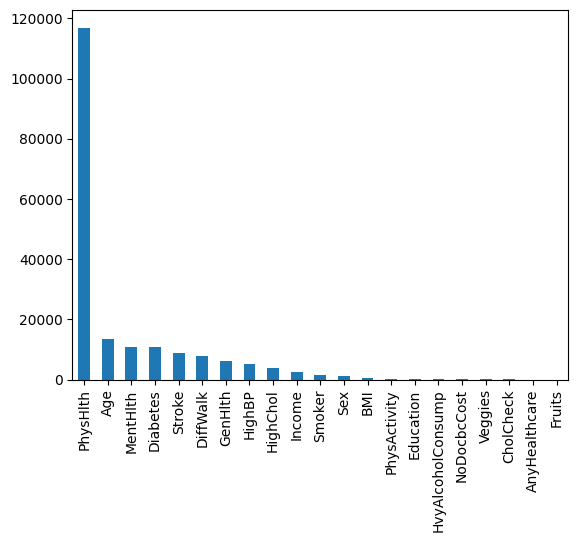

In [277]:
chi_values= pd.Series(chi_scores[0],index=x_.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

In [278]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=8)


In [279]:
dt_model.fit(x_,y_)

DecisionTreeClassifier(max_depth=8)

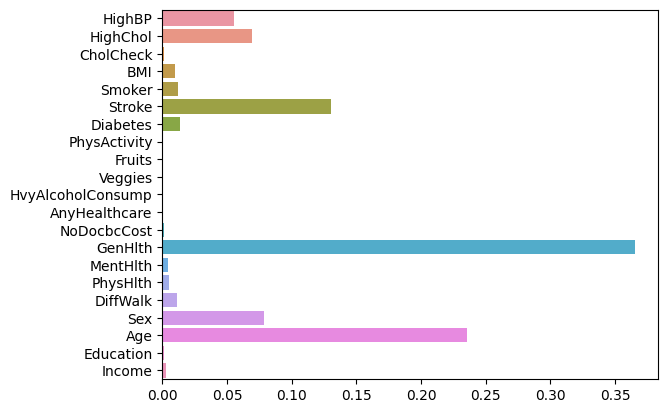

In [280]:
# feature selection by decision tree max depth 5
sns.barplot(x=dt_model.feature_importances_,y=x_.columns)
plt.show()

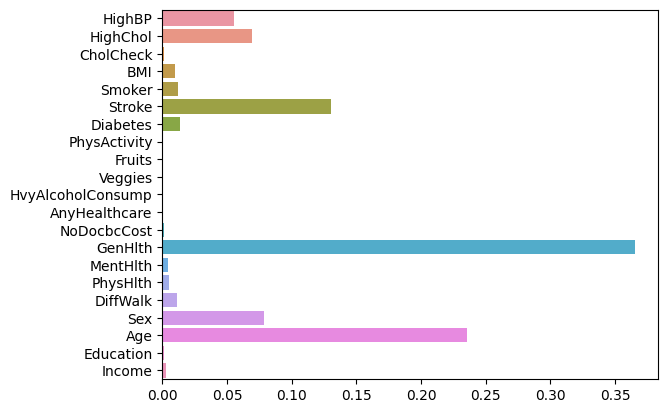

In [281]:
# feature selection by decision tree max depth 8
sns.barplot(x=dt_model.feature_importances_,y=x_.columns)
plt.show()

In [282]:
num_data = df[["BMI","GenHlth","MentHlth","PhysHlth","Age","Education","Income"]]

In [283]:
def uni_vis(df):
  for i in df.columns:
    print("*"*50)
    sns.boxplot(data=df,x=i)
    plt.title(f"boxplot of {i}")
    plt.show()

    # histogram
    print("*"*50)
    df[i].plot(kind="hist")
    plt.title(f"histogram of {i}")
    plt.show()

    # density plot
    print("*"*50)
    df[i].plot(kind="kde")
    plt.title(f"density plot of {i}")

    plt.show()

    des = df[i].describe()
    print(des)

    skew_ = df[i].skew()
    print(f"skewness of {i}",skew_)

    kurt_ = df[i].kurt()
    print(f"kurtosis of {i}",kurt_)







**************************************************


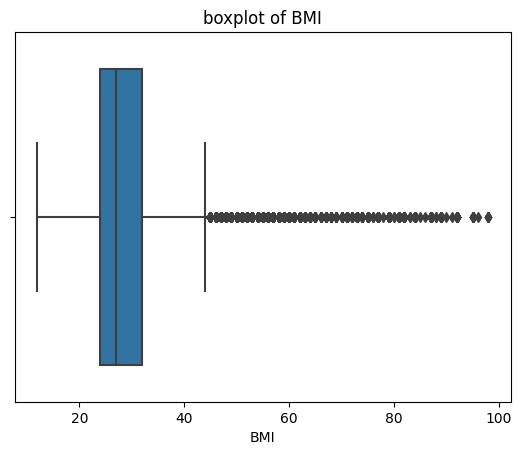

**************************************************


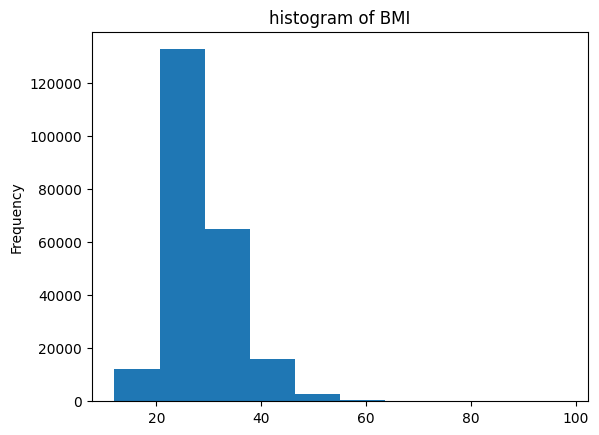

**************************************************


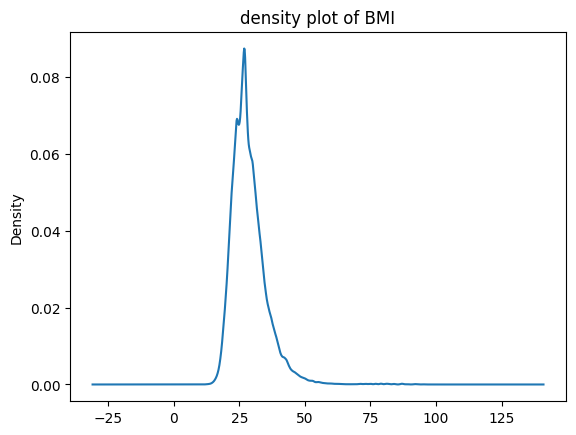

count    229762.000000
mean         28.685818
std           6.786308
min          12.000000
25%          24.000000
50%          27.000000
75%          32.000000
max          98.000000
Name: BMI, dtype: float64
skewness of BMI 2.064076050356578
kurtosis of BMI 10.475124719498691
**************************************************


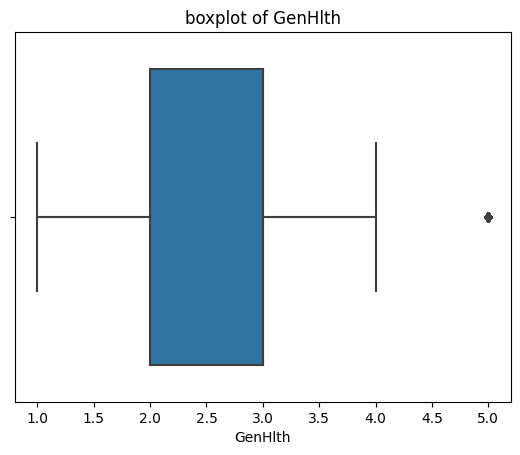

**************************************************


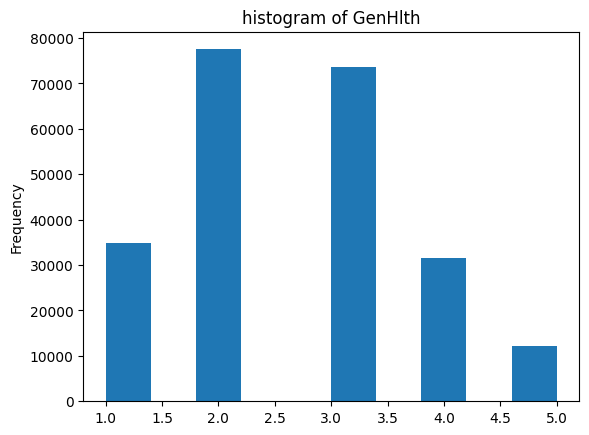

**************************************************


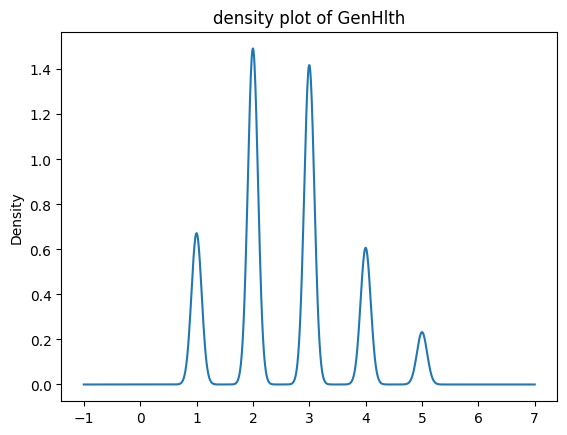

count    229762.000000
mean          2.601144
std           1.064680
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64
skewness of GenHlth 0.35205435198914453
kurtosis of GenHlth -0.4185866794454065
**************************************************


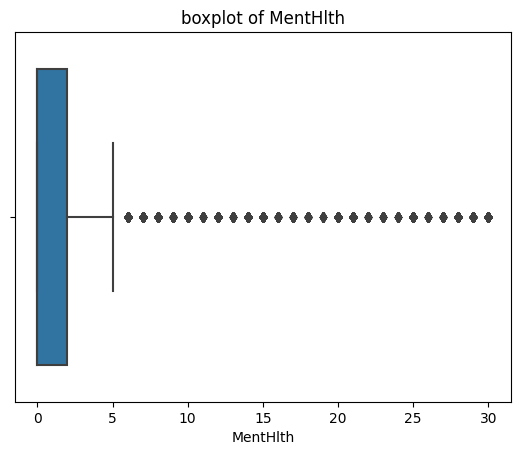

**************************************************


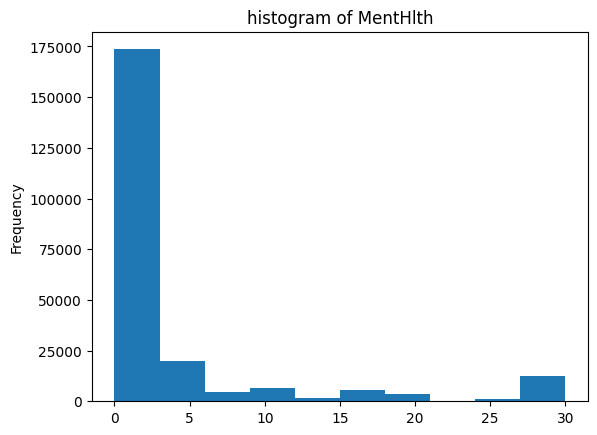

**************************************************


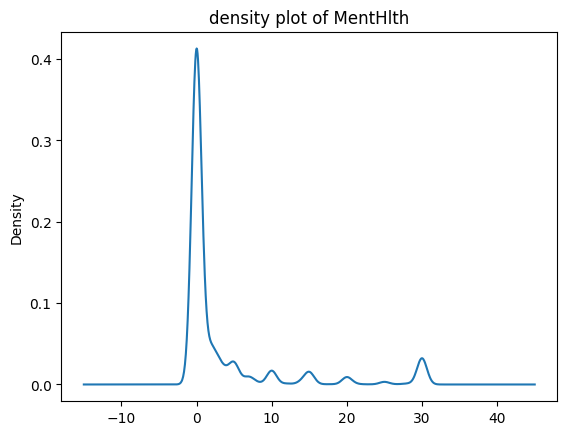

count    229762.000000
mean          3.505406
std           7.713722
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64
skewness of MentHlth 2.546813473201898
kurtosis of MentHlth 5.447970114435838
**************************************************


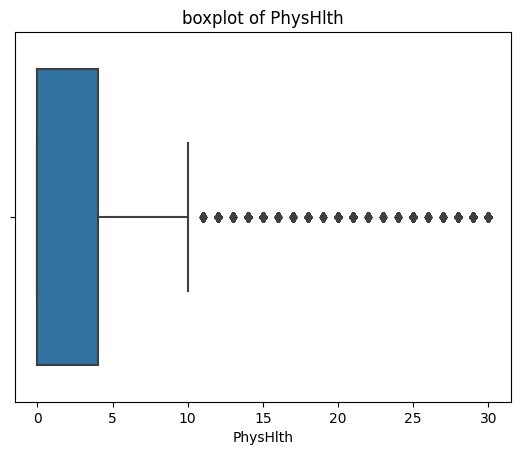

**************************************************


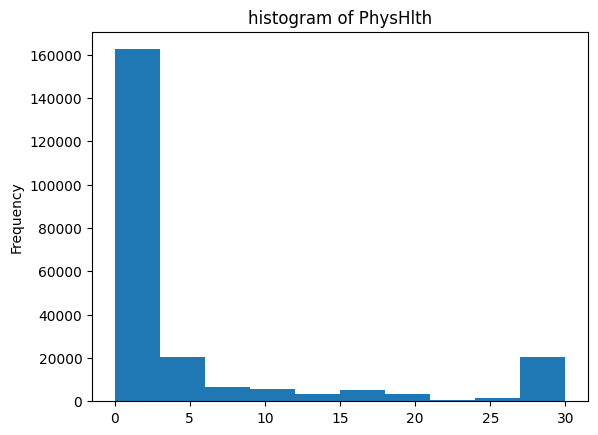

**************************************************


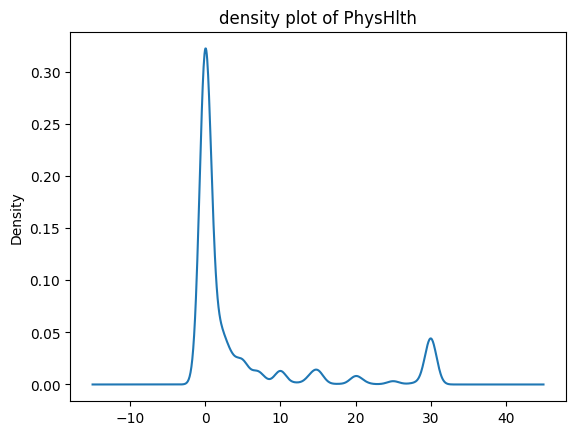

count    229762.000000
mean          4.675155
std           9.046547
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: PhysHlth, dtype: float64
skewness of PhysHlth 2.0462445877496402
kurtosis of PhysHlth 2.770697706990867
**************************************************


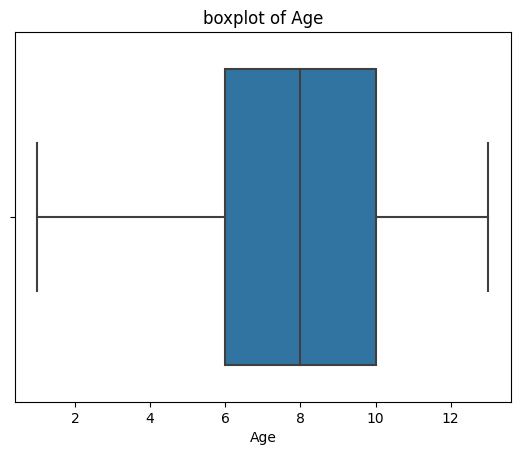

**************************************************


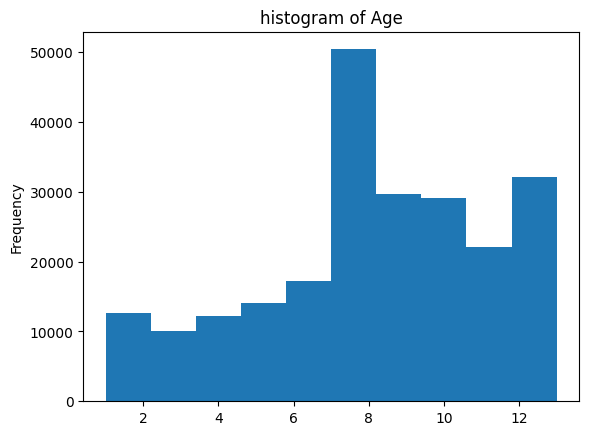

**************************************************


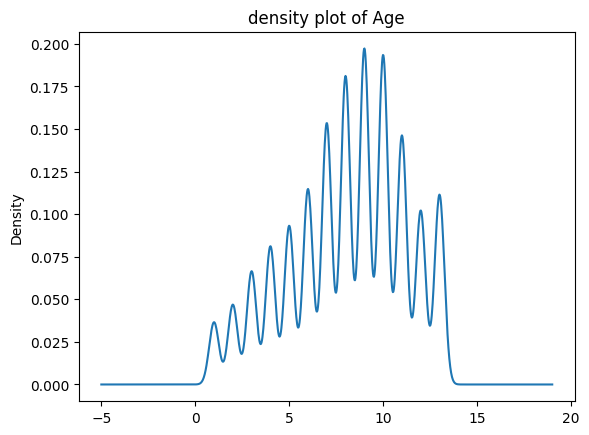

count    229762.000000
mean          8.086672
std           3.093792
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64
skewness of Age -0.38521264470736416
kurtosis of Age -0.588216988976614
**************************************************


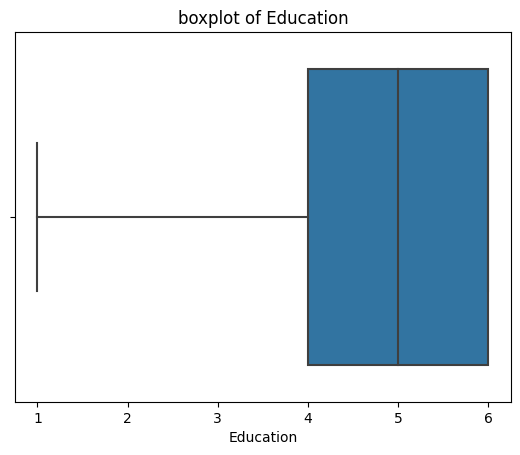

**************************************************


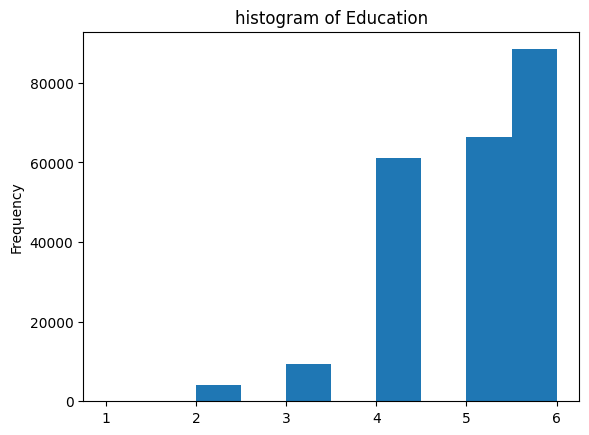

**************************************************


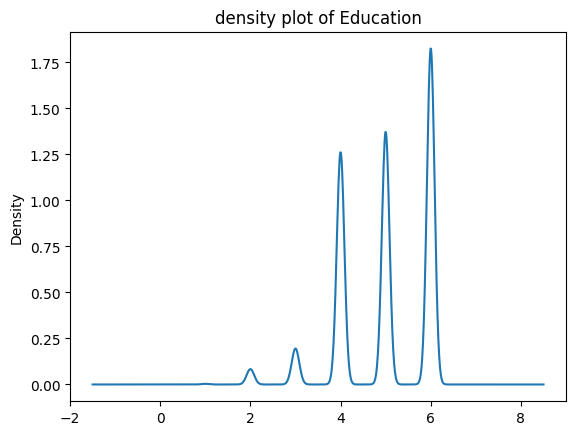

count    229762.000000
mean          4.980593
std           0.992835
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: Education, dtype: float64
skewness of Education -0.6910621997442356
kurtosis of Education -0.043607510263324656
**************************************************


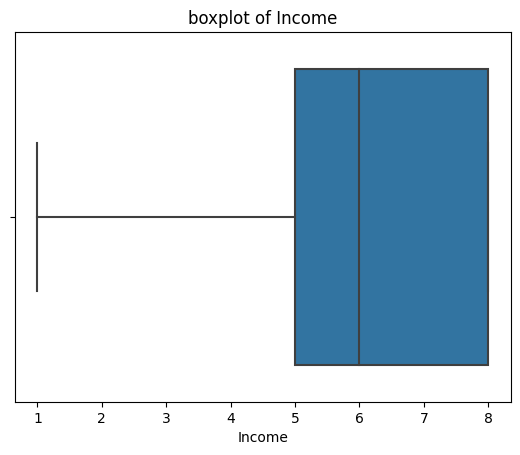

**************************************************


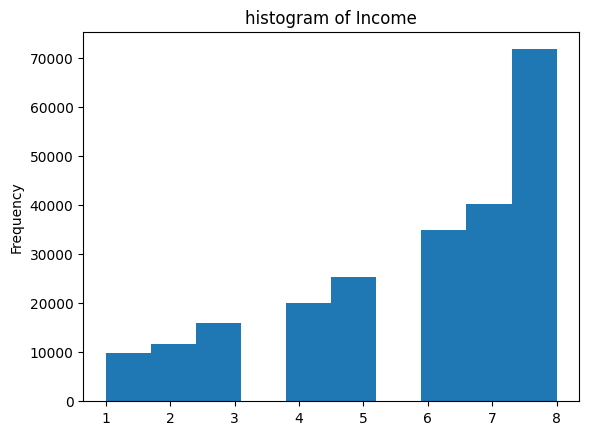

**************************************************


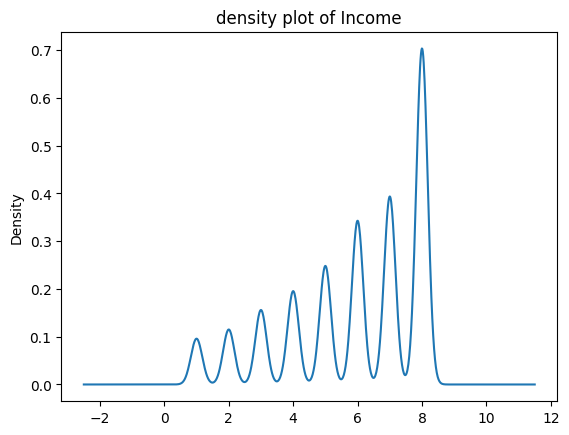

count    229762.000000
mean          5.890565
std           2.092372
min           1.000000
25%           5.000000
50%           6.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64
skewness of Income -0.7817214783848793
kurtosis of Income -0.4664148638345704


In [284]:
uni_vis(num_data)

In [285]:
def bi_box(df,col1,col2):
  for i in col1.columns:
    for j in col2.columns:
      print("*"*30)
      ax=sns.countplot(data=df,y=i,hue=j)
      plt.title(f"boxplot of{i,j} ")
      plt.xticks(rotation=90)
      plt.show()

In [286]:
col1=df.iloc[:,1:22]
col2=df[["HeartDiseaseorAttack"]]

******************************


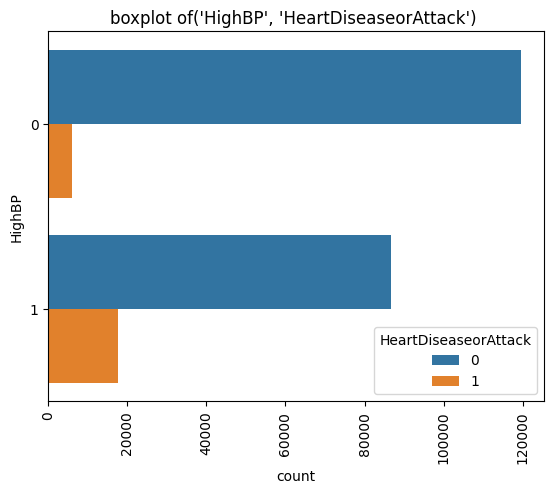

******************************


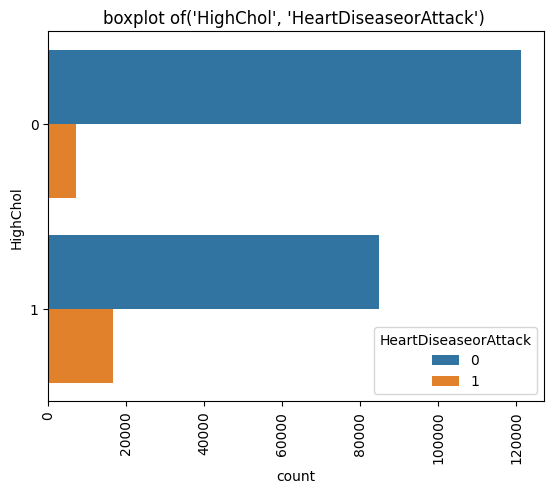

******************************


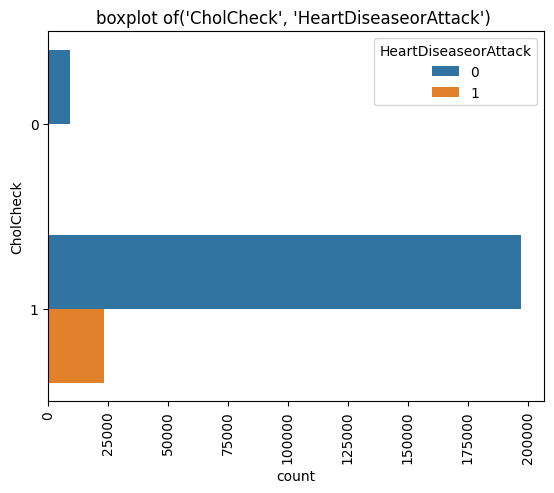

******************************


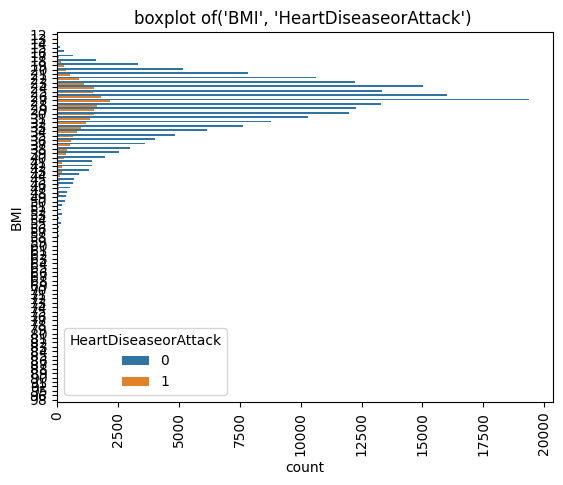

******************************


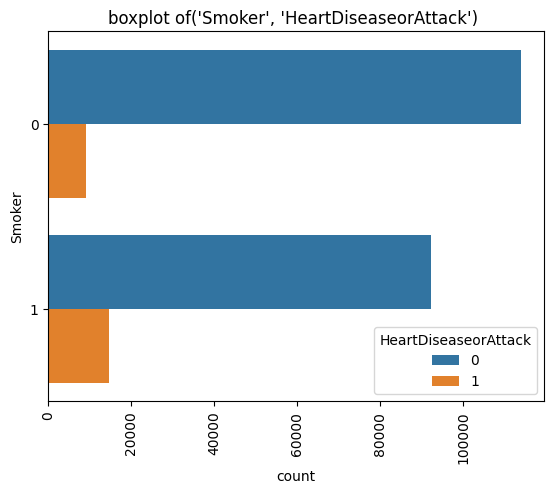

******************************


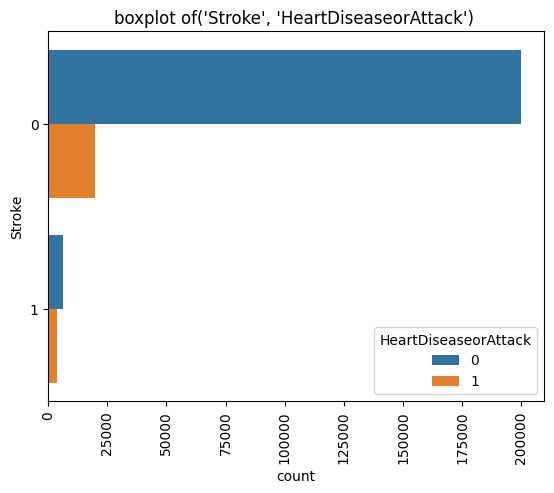

******************************


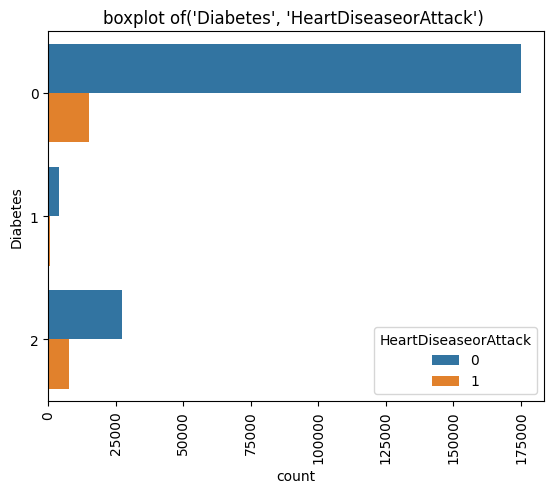

******************************


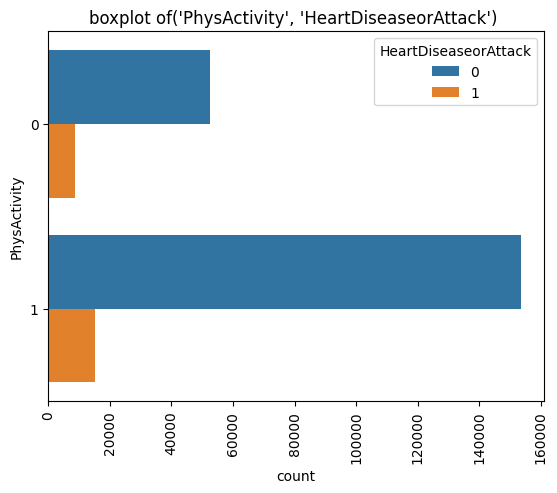

******************************


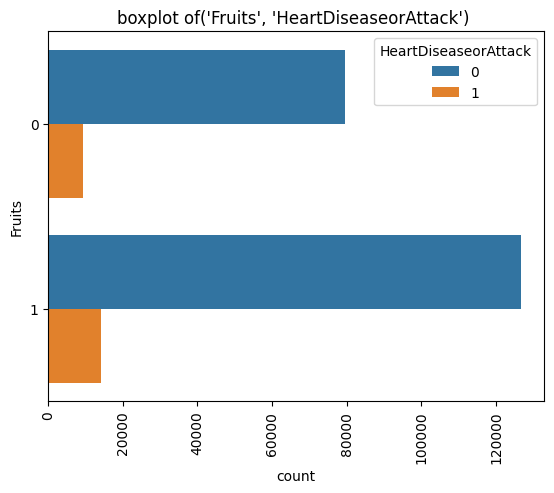

******************************


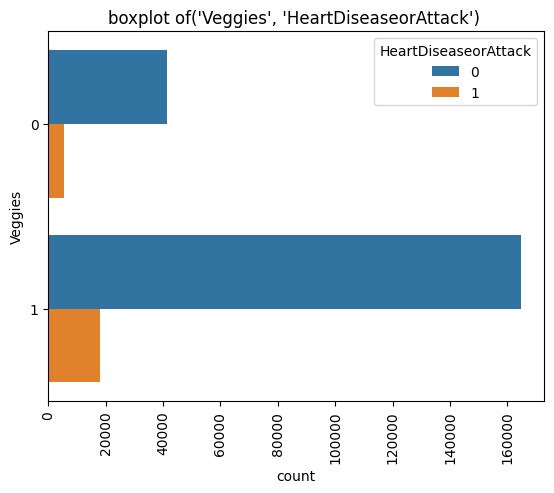

******************************


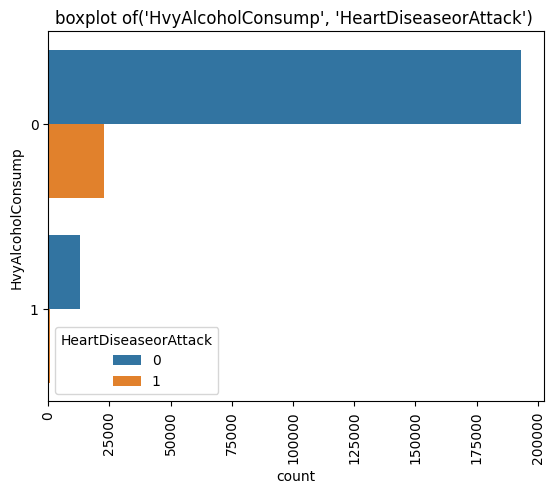

******************************


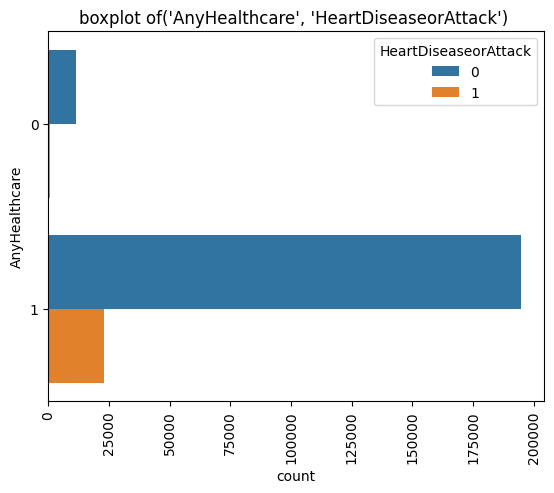

******************************


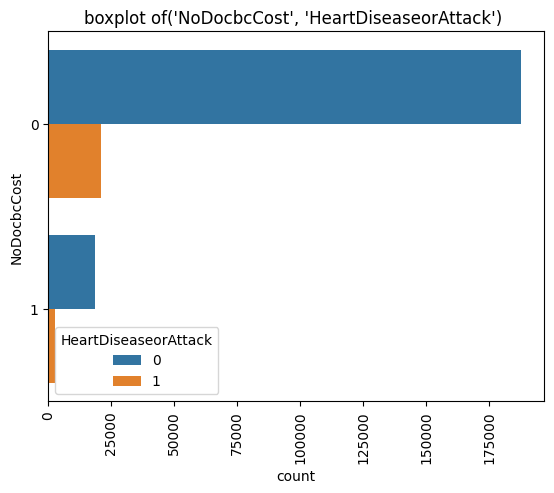

******************************


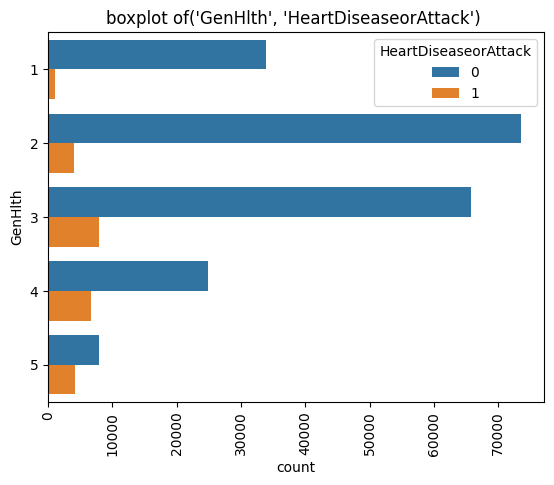

******************************


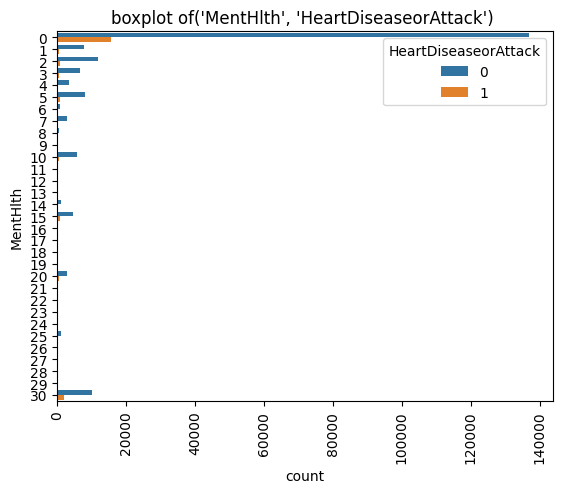

******************************


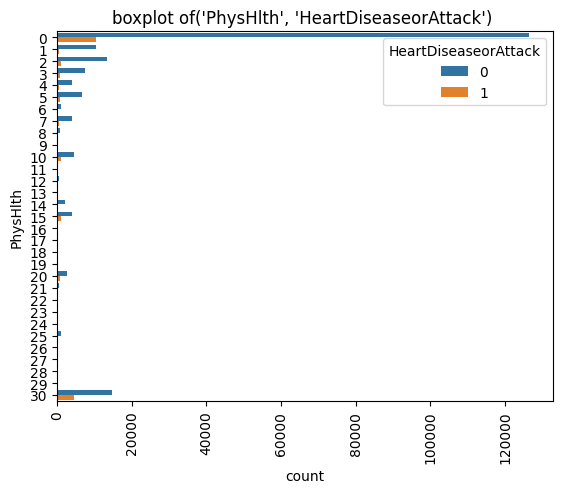

******************************


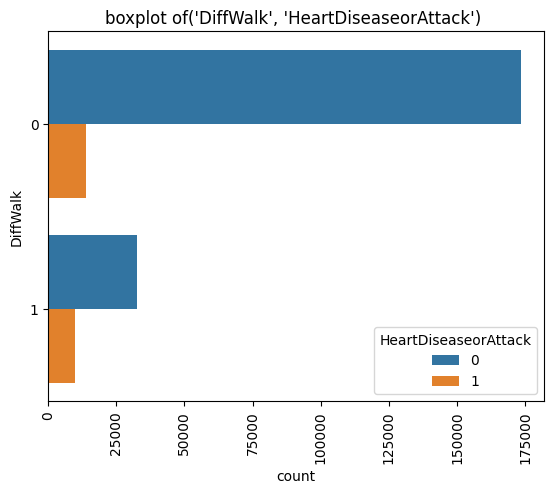

******************************


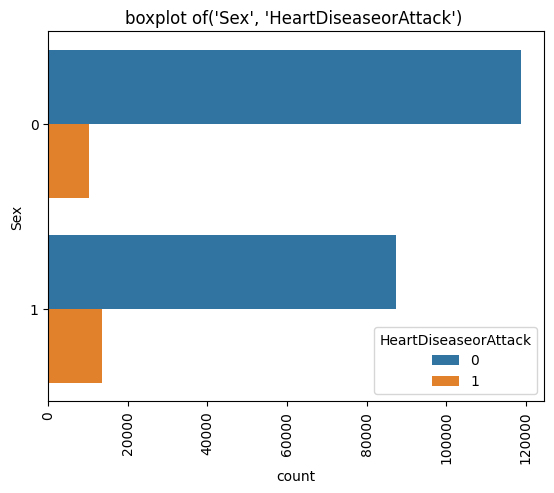

******************************


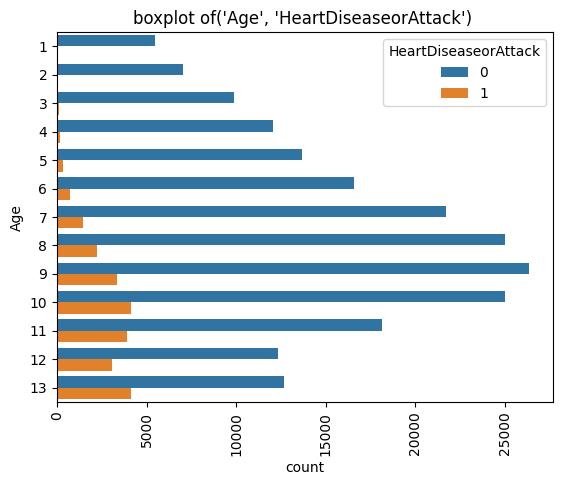

******************************


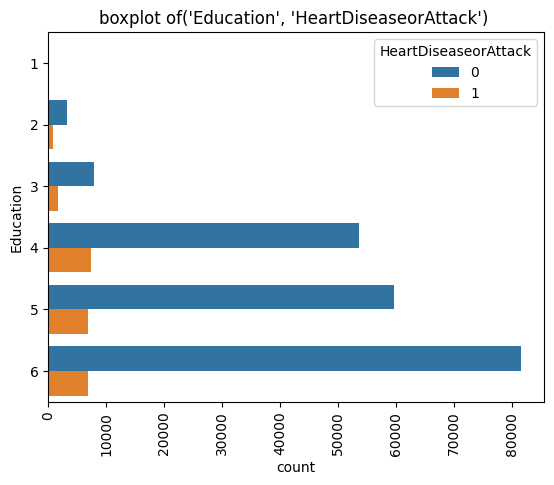

******************************


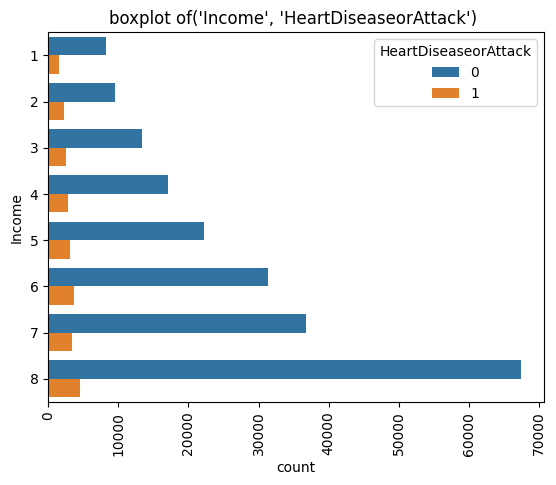

In [287]:
bi_box(df,col1,col2)

In [288]:
def bi_boxplot(df,col1,col2):




  print("*"*30)
  sns.countplot(data=df,y=col1,hue=col2)
  plt.title(f"boxplot of{col1,col2} ")
  plt.xticks(rotation=90)

  plt.show()

******************************


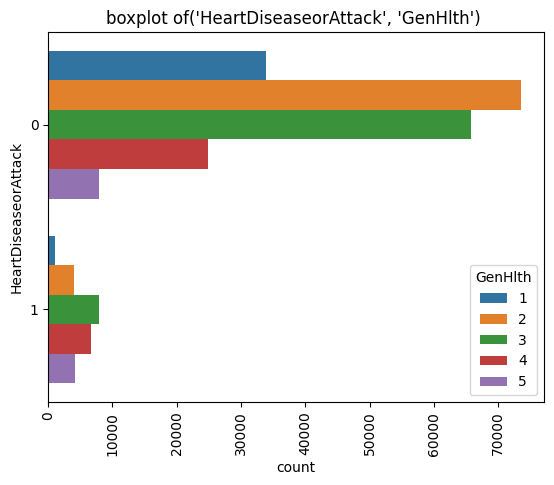

In [289]:
bi_boxplot(df,"HeartDiseaseorAttack","GenHlth")

******************************


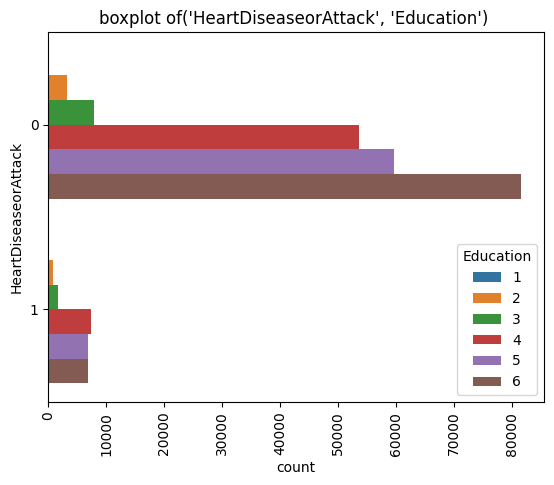

In [290]:
bi_boxplot(df,"HeartDiseaseorAttack","Education")

- The educated people are less impacted with heart disease and uneducated people effected by heart disease
- The people who did the general health check up are not effected by heart attack
- The female are more effected to compare male
- The age increaseing the heart attack/diseases are  also increasing
- The High BP, High cholestrol and smoking both reasons for heart diseases

<ipython-input-291-82562a29f3f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax=df.groupby("Sex")["Education","HeartDiseaseorAttack"].agg(["max","mean"]).plot(kind="bar")


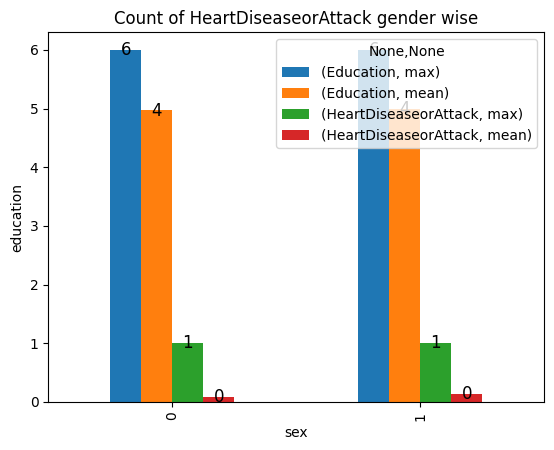

In [291]:
ax=df.groupby("Sex")["Education","HeartDiseaseorAttack"].agg(["max","mean"]).plot(kind="bar")

# Add labels and a title
plt.xlabel('sex')
plt.ylabel('education')
plt.title('Count of HeartDiseaseorAttack gender wise')

# Display values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black')
plt.show()




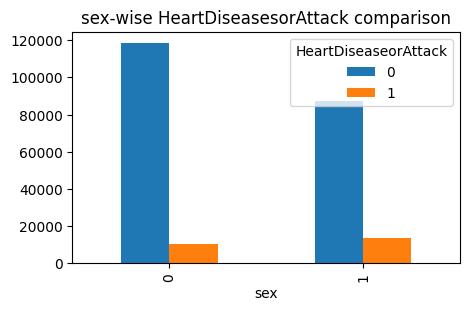

In [292]:
# Race-wise income comparison
pd.crosstab(index=df['Sex'], columns=df['HeartDiseaseorAttack']).plot(kind='bar', figsize=(5,3))
plt.title("sex-wise HeartDiseasesorAttack comparison")
plt.xlabel("sex")
plt.show()


## In Gender both male and female are problems of heart diseases but male count is high to compare with females

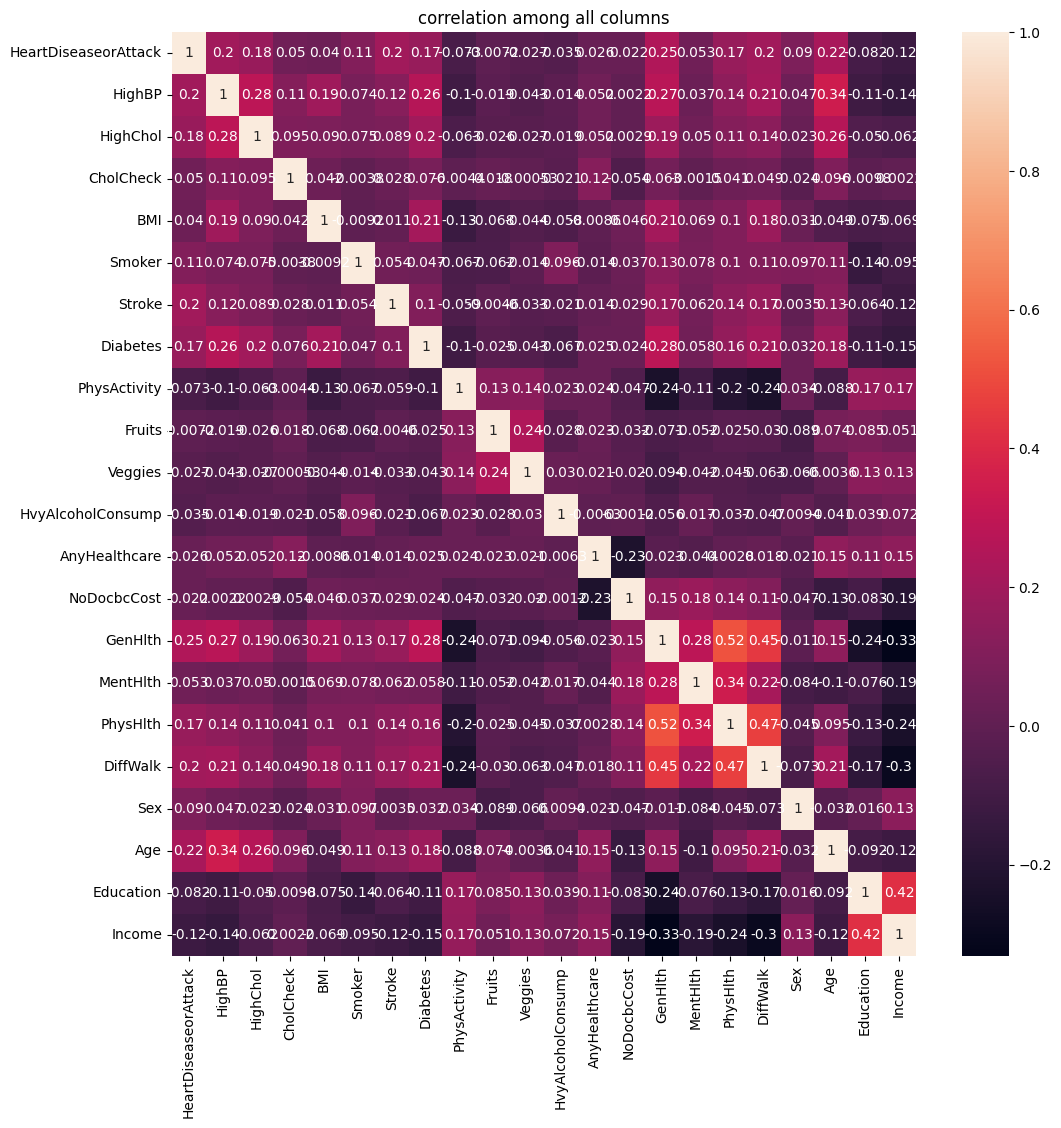

In [293]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation among all columns")
plt.show()

# There is high correlation between input features







In [294]:
# outliers detection # only  single column wise
def outlier_detection(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3-q1

  # lower boundary
  l = q1-(3.0*iqr)
  # upper boundary
  u = q3+(3.0*iqr)
  outliers =df[(df[col]<l)| (df[col]>u)]
  return outliers

In [295]:
 #outliers detection for display all at time
def outlier_detection_all(df):
  for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3-q1

    # lower boundary
    l = q1-(3.0*iqr)
    # upper boundary
    u = q3+(3.0*iqr)
    outliers =df[(df[i]<l)| (df[i]>u)]
    print( outliers)
    print("*"*50)
    print(f"count of outlies {i}",len(outliers))
    print("*"*50)

In [296]:
# outliers removing
def outlier_deletion(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3-q1

  # lower boundary
  l = q1-(3.0*iqr)
  # upper boundary
  u = q3+(3.0*iqr)
  df=df[(df[col]>l)&(df[col]<u)]
  return df

In [297]:
outlier_detection_all(num_data)

        BMI  GenHlth  MentHlth  PhysHlth  Age  Education  Income
670      59        3         0         0    5          6       1
1209     57        4        15        30    7          6       4
1754     57        3         3         5    5          5       5
2013     57        4        25         5    6          5       3
2278     58        5        12        30    8          6       7
...     ...      ...       ...       ...  ...        ...     ...
245737   57        3         0         0    2          6       6
249242   58        3         2         2    6          5       5
249875   63        1         5         0    6          5       5
252332   61        4         0         8    7          6       1
253330   60        4         0         4    6          5       2

[1079 rows x 7 columns]
**************************************************
count of outlies BMI 1079
**************************************************
Empty DataFrame
Columns: [BMI, GenHlth, MentHlth, PhysHlth, Age, Ed

In [298]:
df=outlier_deletion(df,"BMI")

In [299]:
df.shape

(228574, 22)

In [300]:
df = outlier_deletion(df,"MentHlth")
df.shape

(196772, 22)

In [301]:
df=outlier_deletion(df,"PhysHlth")
df.shape

(171008, 22)

#### There are so many outliers are in data as per my knowledge outliers will impact the model so, i removed 20% of the data

In [302]:
df
# after reoving the outliers

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
253657,0,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,3
253658,0,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,5
253659,0,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,1


# Building the ANN model

In [303]:
# identify the input and output
x=df[["HighBP","HighChol","BMI","Stroke","GenHlth","Sex","Age","PhysHlth","MentHlth","Income","Education"]]
y=df["HeartDiseaseorAttack"]

In [304]:
# split the data train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(128256, 11) (128256,)
(42752, 11) (42752,)


In [305]:
# preprocessing of train data
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
# to preserve column names and indexes
x_train_ = pd.DataFrame(s.fit_transform(x_train),
                      columns=x_train.columns,
                      index=x_train.index)


In [306]:
# test data preprocessing
# to preserve column names and indexes
x_test_ = pd.DataFrame(s.transform(x_test),
                      columns=x_test.columns,
                      index=x_test.index)


In [307]:
x_train_.head()

,HighBP,HighChol,BMI,Stroke,GenHlth,Sex,Age,PhysHlth,MentHlth,Income,Education
22492,-0.856087,1.182173,1.027385,-0.180988,0.751555,1.081176,-0.339311,-0.487973,2.176957,0.944966,-2.108907
118342,-0.856087,-0.845900,-0.725298,-0.180988,-1.491907,-0.924919,-1.935521,-0.487973,-0.446535,0.430515,0.985900
84385,1.168106,1.182173,0.676848,-0.180988,1.873286,-0.924919,0.937656,-0.487973,-0.446535,-2.141744,-3.140510
199404,-0.856087,-0.845900,0.852116,-0.180988,0.751555,-0.924919,-1.297037,-0.487973,-0.446535,-0.083937,-0.045702
65579,1.168106,-0.845900,-0.199493,-0.180988,1.873286,-0.924919,0.618414,-0.487973,-0.446535,-2.656195,-0.045702


In [308]:
x_test_.head()

,HighBP,HighChol,BMI,Stroke,GenHlth,Sex,Age,PhysHlth,MentHlth,Income,Education
173294,1.168106,1.182173,4.532750,-0.180988,1.873286,-0.924919,0.937656,0.735128,1.521084,-2.141744,-0.045702
60442,1.168106,1.182173,0.151043,-0.180988,0.751555,-0.924919,0.618414,0.735128,-0.446535,-2.141744,-1.077305
53842,-0.856087,1.182173,2.429531,-0.180988,1.873286,-0.924919,-1.297037,1.346679,1.521084,-2.656195,-0.045702
46143,1.168106,1.182173,-1.776907,-0.180988,0.751555,-0.924919,1.256898,-0.487973,-0.446535,-0.598389,-1.077305
112066,1.168106,-0.845900,0.852116,-0.180988,-0.370176,-0.924919,0.937656,1.346679,-0.446535,-0.083937,-1.077305


# Treating the imbalance of target feature

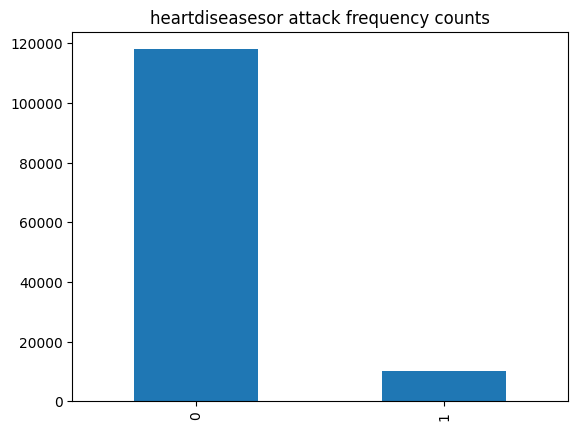

In [309]:
y_train.value_counts().plot(kind="bar")
plt.title("heartdiseasesor attack frequency counts")

plt.show()

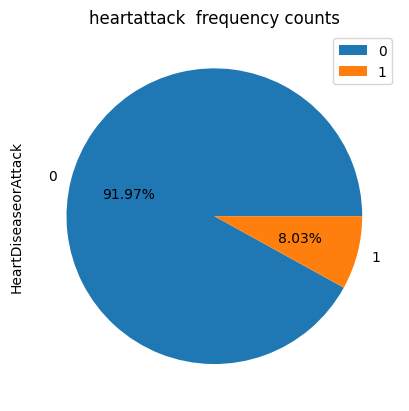

In [310]:
y_train.value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.title("heartattack  frequency counts")
plt.legend()
plt.show()


In [311]:
# importing iml library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [312]:
x_train_,y_train =smote.fit_resample(x_train_,y_train)

In [313]:
y_train.value_counts()

0    117957
1    117957
Name: HeartDiseaseorAttack, dtype: int64

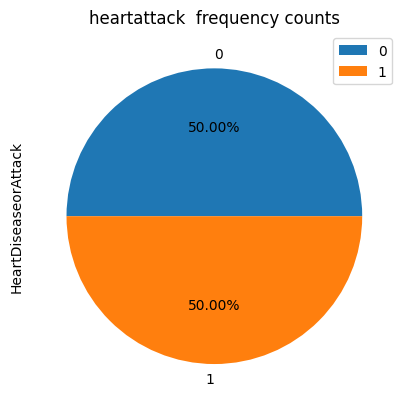

In [314]:
y_train.value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.title("heartattack  frequency counts")
plt.legend()
plt.show()


# Building logical structure

In [315]:
import tensorflow as tf
import keras_tuner as kt

from keras.layers import Dropout, BatchNormalization,Dense,Input
from keras import Sequential


In [316]:
def balanced_model(hp):
    model=Sequential()
    model.add(Input(shape=(11,)))

    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=13)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=20),activation="tanh",kernel_initializer=hp.Choice("weight_init",values=["glorot_uniform","glorot_normal","he_uniform","he_normal"])))
                model.add(BatchNormalization())
                model.add(Dropout(rate=hp.Float("dropout", min_value=0.0, max_value=0.3)))
    model.add( Dense(1,activation="sigmoid"))
    optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop', 'adadelta'])

    model.compile(loss='binary_crossentropy', optimizer=optimizer_choice, metrics=['accuracy'])
    return model

In [317]:
# List of models with all initializations

tuner=kt.RandomSearch(balanced_model,objective="val_accuracy",max_trials=3,directory=r"/content/drive/MyDrive/best_models",project_name="list_of_models_4")


Reloading Tuner from /content/drive/MyDrive/best_models/list_of_models_4/tuner0.json


# training

In [318]:
# List of models with all initializations - Training

tuner.search(x_train_,y_train,epochs=12,validation_split=0.2)

In [319]:
tuner.search_space_summary()

Search space summary
Default search space size: 14
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 13, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
weight_init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'], 'ordered': False}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': None, 'sampling': 'linear'}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_valu

In [320]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/best_models/list_of_models_4
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 15
weight_init: he_uniform
dropout: 0.02053365894169693
neurons1: 6
neurons2: 16
neurons3: 19
neurons4: 13
optimizer: sgd
neurons5: 1
neurons6: 15
neurons7: 1
neurons8: 1
neurons9: 1
Score: 0.8737273216247559

Trial 2 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 16
weight_init: glorot_normal
dropout: 0.14758123169043463
neurons1: 9
neurons2: 11
neurons3: 11
neurons4: 15
optimizer: adam
neurons5: 4
neurons6: 7
neurons7: 18
neurons8: 20
neurons9: 16
Score: 0.7721024751663208

Trial 0 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 2
weight_init: glorot_normal
dropout: 0.08106179443026064
neurons1: 8
neurons2: 19
neurons3: 10
neurons4: 12
optimizer: sgd
neurons5: 1
neurons6: 1
Score: 0.7414305210113525


In [321]:
tuner.get_best_hyperparameters()[0].values


{'hiddenlayers': 10,
 'neurons0': 15,
 'weight_init': 'he_uniform',
 'dropout': 0.02053365894169693,
 'neurons1': 6,
 'neurons2': 16,
 'neurons3': 19,
 'neurons4': 13,
 'optimizer': 'sgd',
 'neurons5': 1,
 'neurons6': 15,
 'neurons7': 1,
 'neurons8': 1,
 'neurons9': 1}

In [322]:
final_model = tuner.get_best_models(num_models=1)[0]

In [323]:
final_model

In [324]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 batch_normalization (Batch  (None, 15)                60        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 96        
                                                                 
 batch_normalization_1 (Bat  (None, 6)                 24        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0

In [ ]:
hist = final_model.fit(x_train_,y_train,batch_size=500,epochs=20,validation_split=0.2)

Epoch 1/20
378/378 [==============================] - 9s 10ms/step - loss: 0.5372 - accuracy: 0.7209 - val_loss: 0.7437 - val_accuracy: 0.8650
Epoch 2/20
378/378 [==============================] - 3s 9ms/step - loss: 0.5361 - accuracy: 0.7222 - val_loss: 0.7393 - val_accuracy: 0.8647
Epoch 3/20
378/378 [==============================] - 4s 11ms/step - loss: 0.5359 - accuracy: 0.7230 - val_loss: 0.7419 - val_accuracy: 0.8631
Epoch 4/20
378/378 [==============================] - 4s 11ms/step - loss: 0.5354 - accuracy: 0.7237 - val_loss: 0.7473 - val_accuracy: 0.8603
Epoch 5/20
378/378 [==============================] - 3s 9ms/step - loss: 0.5356 - accuracy: 0.7238 - val_loss: 0.7444 - val_accuracy: 0.8596
Epoch 6/20
378/378 [==============================] - 3s 9ms/step - loss: 0.5355 - accuracy: 0.7248 - val_loss: 0.7479 - val_accuracy: 0.8569
Epoch 7/20
378/378 [==============================] - 4s 11ms/step - loss: 0.5348 - accuracy: 0.7258 - val_loss: 0.7431 - val_accuracy: 0.8580
Ep

In [326]:
hist1 = final_model.fit(x_train_,y_train,batch_size=150,epochs=20,validation_split=0.2)

1259/1259 [==============================] - 10s 8ms/step - loss: 0.5345 - accuracy: 0.7305 - val_loss: 0.7379 - val_accuracy: 0.8449
Epoch 2/20
1259/1259 [==============================] - 9s 7ms/step - loss: 0.5343 - accuracy: 0.7308 - val_loss: 0.7480 - val_accuracy: 0.8432
Epoch 3/20
1259/1259 [==============================] - 9s 7ms/step - loss: 0.5340 - accuracy: 0.7304 - val_loss: 0.7434 - val_accuracy: 0.8466
Epoch 4/20
1259/1259 [==============================] - 10s 8ms/step - loss: 0.5336 - accuracy: 0.7295 - val_loss: 0.7316 - val_accuracy: 0.8504
Epoch 5/20
1259/1259 [==============================] - 8s 7ms/step - loss: 0.5325 - accuracy: 0.7294 - val_loss: 0.7354 - val_accuracy: 0.8456
Epoch 6/20
1259/1259 [==============================] - 10s 8ms/step - loss: 0.5312 - accuracy: 0.7301 - val_loss: 0.7431 - val_accuracy: 0.8408
Epoch 7/20
1259/1259 [==============================] - 12s 9ms/step - loss: 0.5303 - accuracy: 0.7326 - val_loss: 0.7243 - val_accuracy: 0.8293

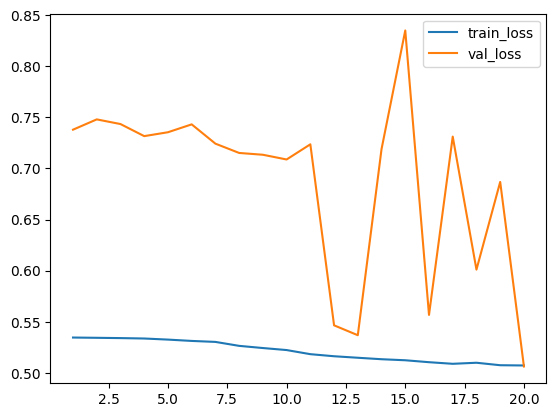

In [327]:
# Train and validate loss trade off
plt.plot(range(1,21),hist1.history["loss"],label="train_loss")
plt.plot(range(1,21),hist1.history["val_loss"],label="val_loss")
plt.legend()

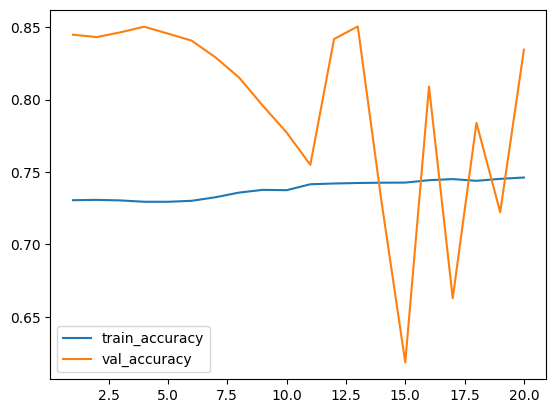

In [328]:
# Train and validate loss trade off
plt.plot(range(1,21),hist1.history["accuracy"],label="train_accuracy")
plt.plot(range(1,21),hist1.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [329]:
# prediction
y_test_predicted = final_model.predict(x_test_)

1336/1336 [==============================] - 3s 2ms/step


In [330]:
y_test_predicted # probabilistic values

array([[0.76077265],
       [0.66726524],
       [0.20061623],
       ...,
       [0.4431222 ],
       [0.08345791],
       [0.51614016]], dtype=float32)

In [331]:
# converting the probabilities
final_predicted = np.where(y_test_predicted>=0.5,1,0)

In [332]:
final_predicted

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [333]:
# evalution of the data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
accuracy_score(y_test,final_predicted)

0.702376497005988

In [334]:
print(classification_report(y_test,final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     39233
           1       0.19      0.82      0.31      3519

    accuracy                           0.70     42752
   macro avg       0.58      0.76      0.56     42752
weighted avg       0.91      0.70      0.77     42752



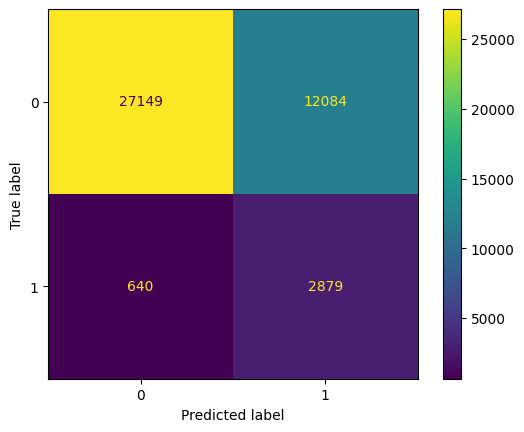

In [335]:
cm =confusion_matrix(y_test,final_predicted)
sp = ConfusionMatrixDisplay(cm)
sp.plot()
plt.show()

# model 2

In [336]:
# list of models relu

def balanced_model(hp):
    model=Sequential()
    model.add(Input(shape=(x_train_.shape[1],)))

    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=15)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=20),activation="relu"))

    model.add(Dense(1,activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [337]:
tuner =kt.RandomSearch(balanced_model,objective="accuracy",max_trials=3,directory=r"/content/drive/MyDrive/best_models",project_name="list of relu_1")

Reloading Tuner from /content/drive/MyDrive/best_models/list of relu_1/tuner0.json


In [338]:
tuner.search(x_train_,y_train,epochs=15,validation_data=(x_test_,y_test))

In [339]:
tuner.search_space_summary()

Search space summary
Default search space size: 16
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons6 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons7 

In [340]:
tuner.get_best_hyperparameters()[0].values


{'hiddenlayers': 8,
 'neurons0': 3,
 'neurons1': 10,
 'neurons2': 10,
 'neurons3': 11,
 'neurons4': 8,
 'neurons5': 1,
 'neurons6': 1,
 'neurons7': 1}

In [341]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/best_models/list of relu_1
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 0 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 3
neurons1: 10
neurons2: 10
neurons3: 11
neurons4: 8
neurons5: 1
neurons6: 1
neurons7: 1
Score: 0.7652320861816406

Trial 1 summary
Hyperparameters:
hiddenlayers: 15
neurons0: 10
neurons1: 4
neurons2: 12
neurons3: 13
neurons4: 16
neurons5: 6
neurons6: 15
neurons7: 2
neurons8: 1
neurons9: 1
neurons10: 1
neurons11: 1
neurons12: 1
neurons13: 1
neurons14: 1
Score: 0.5021717548370361

Trial 2 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 13
neurons1: 8
neurons2: 2
neurons3: 7
neurons4: 4
neurons5: 1
neurons6: 1
neurons7: 20
neurons8: 20
neurons9: 17
neurons10: 11
neurons11: 18
neurons12: 12
neurons13: 13
neurons14: 14
Score: 0.5013743042945862


In [342]:
fmodel = tuner.get_best_models(num_models=1)[0]
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 11)                121       
                                                                 
 dense_4 (Dense)             (None, 8)                 96        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [343]:
hist_2 = fmodel.fit(x_train_,y_train,batch_size=200,epochs=15,validation_split=0.2)

Epoch 1/15
944/944 [==============================] - 6s 4ms/step - loss: 0.4785 - accuracy: 0.7617 - val_loss: 0.6467 - val_accuracy: 0.7095
Epoch 2/15
944/944 [==============================] - 3s 3ms/step - loss: 0.4779 - accuracy: 0.7624 - val_loss: 0.6844 - val_accuracy: 0.6819
Epoch 3/15
944/944 [==============================] - 3s 3ms/step - loss: 0.4780 - accuracy: 0.7620 - val_loss: 0.6634 - val_accuracy: 0.6972
Epoch 4/15
944/944 [==============================] - 5s 5ms/step - loss: 0.4779 - accuracy: 0.7623 - val_loss: 0.6995 - val_accuracy: 0.6673
Epoch 5/15
944/944 [==============================] - 4s 4ms/step - loss: 0.4779 - accuracy: 0.7622 - val_loss: 0.6632 - val_accuracy: 0.6961
Epoch 6/15
944/944 [==============================] - 3s 3ms/step - loss: 0.4779 - accuracy: 0.7622 - val_loss: 0.6358 - val_accuracy: 0.7194
Epoch 7/15
944/944 [==============================] - 4s 4ms/step - loss: 0.4778 - accuracy: 0.7620 - val_loss: 0.6274 - val_accuracy: 0.7259
Epoch 

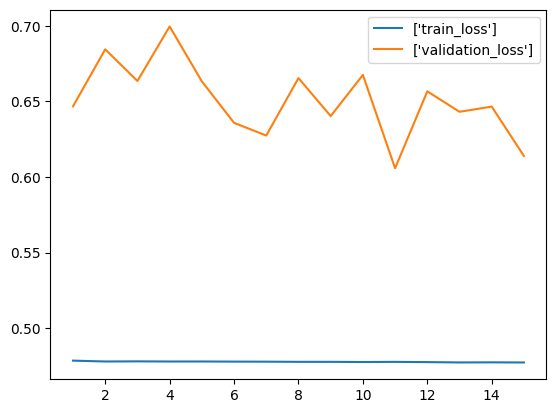

In [344]:
plt.plot(range(1,16),hist_2.history["loss"],label=["train_loss"])
plt.plot(range(1,16),hist_2.history["val_loss"],label=["validation_loss"])
plt.legend()

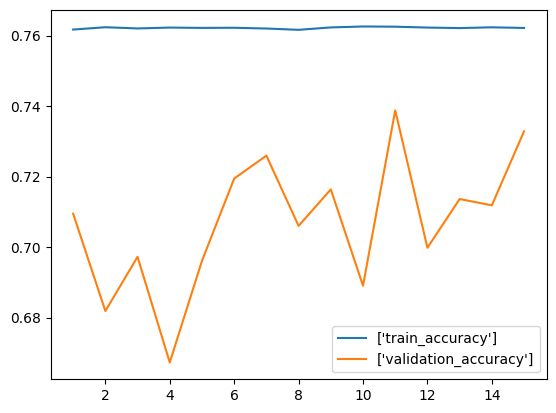

In [345]:
plt.plot(range(1,16),hist_2.history["accuracy"],label=["train_accuracy"])
plt.plot(range(1,16),hist_2.history["val_accuracy"],label=["validation_accuracy"])
plt.legend()

In [346]:
# predictions

y_test_pred_model_2 = fmodel.predict(x_test_)

1336/1336 [==============================] - 2s 2ms/step


In [347]:
# probabilistic values of model
y_test_pred_model_2

array([[0.73607177],
       [0.5934247 ],
       [0.1609263 ],
       ...,
       [0.22955023],
       [0.02366072],
       [0.47208354]], dtype=float32)

In [348]:
# conerting the probabilities
final_pred_model_2 = np.where(y_test_pred_model_2>=0.5,1,0)

In [349]:
final_pred_model_2


array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [350]:
# evalution metrics
accuracy_score(y_test,final_pred_model_2)

0.7771800149700598

In [351]:
# claasification report
print("classification report",classification_report(y_test,final_pred_model_2))

classification report               precision    recall  f1-score   support

           0       0.97      0.78      0.87     39233
           1       0.23      0.71      0.34      3519

    accuracy                           0.78     42752
   macro avg       0.60      0.75      0.61     42752
weighted avg       0.91      0.78      0.82     42752



Text(0.5, 1.0, 'confusion matrix of relu AF')

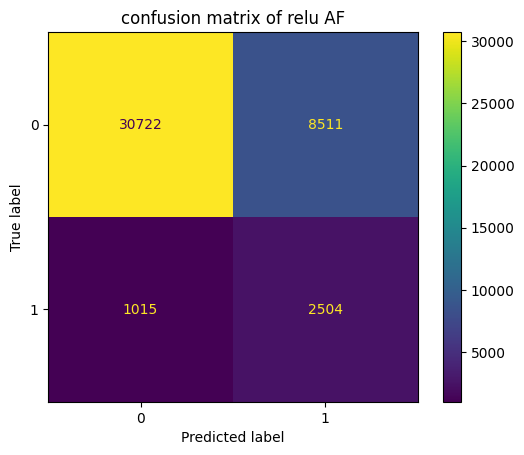

In [352]:
# confusion matrix display
cm_model_2 = confusion_matrix(y_test,final_pred_model_2)
ap = ConfusionMatrixDisplay(cm_model_2)
ap.plot()
plt.title("confusion matrix of relu AF")